In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [215]:
#Getting data and prepping it for histogram

mrna_df = pd.read_csv('data_mrna_seq_v2_rsem_zscores_ref_all_samples_transposed.csv')
mrna_df_1 = mrna_df.drop(519, axis="index") #duplicate

def remove01(x):
    return x.removesuffix('-01')  

    
ids = mrna_df_1['Hugo_Symbol']
new_ids = ids.apply(remove01).to_numpy()
mrna_df_1['Hugo_Symbol'] = new_ids
new_ids = new_ids[1:]

mrna_df_x = mrna_df_1.drop('Hugo_Symbol', axis='columns')
mrna_df_x.drop(0, axis='index', inplace=True)

print(mrna_df_x.head())

   LOC100130426  UBE2Q2P3  UBE2Q2P3.1  HMGB1P1  TIMM23  MOXD2  LOC155060  \
1       -3.0863   -0.5997      1.5294  -0.1743 -0.5550    NaN    -0.0905   
2       -3.0863   -0.8006     -0.8942  -1.4697  1.8552    NaN     0.1934   
3       -3.0863   -0.5059      0.9541  -0.4060 -0.3691    NaN     0.0083   
4       -3.0863   -1.0747     -0.1385   0.5085 -0.6454    NaN    -0.0301   
5       -3.0863    0.3223     -0.7343   0.3452  0.1476    NaN     0.9885   

   RNU12-2P    SSX9  LOC317712  ...    ZXDA    ZXDB    ZXDC  ZYG11A  ZYG11B  \
1   -1.9249 -0.9372        NaN  ... -1.3732 -1.5330 -1.8220  0.6648 -1.5634   
2    0.0736 -0.9372        NaN  ... -0.6671 -1.4660  0.1925 -1.1695 -0.2838   
3    0.6337 -0.9372        NaN  ...  0.6989  0.5530 -1.9006 -1.3729  0.2363   
4    0.9199 -0.9372        NaN  ...  0.1318  0.5613  0.3562  0.0273  0.2199   
5   -0.1476 -0.9372        NaN  ...  0.1838  0.1270  1.4465 -1.4210  0.3683   

      ZYX  FLJ10821    ZZZ3  TPTEP1  AKR1C6P  
1 -0.1694   -0.8894 -

In [216]:
print(mrna_df_x.head())

   LOC100130426  UBE2Q2P3  UBE2Q2P3.1  HMGB1P1  TIMM23  MOXD2  LOC155060  \
1       -3.0863   -0.5997      1.5294  -0.1743 -0.5550    NaN    -0.0905   
2       -3.0863   -0.8006     -0.8942  -1.4697  1.8552    NaN     0.1934   
3       -3.0863   -0.5059      0.9541  -0.4060 -0.3691    NaN     0.0083   
4       -3.0863   -1.0747     -0.1385   0.5085 -0.6454    NaN    -0.0301   
5       -3.0863    0.3223     -0.7343   0.3452  0.1476    NaN     0.9885   

   RNU12-2P    SSX9  LOC317712  ...    ZXDA    ZXDB    ZXDC  ZYG11A  ZYG11B  \
1   -1.9249 -0.9372        NaN  ... -1.3732 -1.5330 -1.8220  0.6648 -1.5634   
2    0.0736 -0.9372        NaN  ... -0.6671 -1.4660  0.1925 -1.1695 -0.2838   
3    0.6337 -0.9372        NaN  ...  0.6989  0.5530 -1.9006 -1.3729  0.2363   
4    0.9199 -0.9372        NaN  ...  0.1318  0.5613  0.3562  0.0273  0.2199   
5   -0.1476 -0.9372        NaN  ...  0.1838  0.1270  1.4465 -1.4210  0.3683   

      ZYX  FLJ10821    ZZZ3  TPTEP1  AKR1C6P  
1 -0.1694   -0.8894 -

In [217]:
#Getting recurance data and filtering Not available 

clinical_df = pd.read_csv('data_clinical_patient_onlydata.csv')

clinical_recur = clinical_df['DFS_STATUS']
recur = []
for i in range(len(clinical_recur)):
    if clinical_ids[i] in new_ids:
        if '0' in clinical_recur[i]:
            recur.append(0)
        elif '1' in clinical_recur[i]:
            recur.append(1)
        else:
            recur.append(2)

na_indicies_list = [i for i in range(len(recur)) if recur[i] != 2]
recur = np.array(recur)[na_indicies_list]

mrna_df_x = mrna_df_x.iloc[na_indicies_list]



new_ids = new_ids[na_indicies_list]
print(recur)






[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1
 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0
 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]


In [218]:
print(mrna_df_x)

     LOC100130426  UBE2Q2P3  UBE2Q2P3.1  HMGB1P1  TIMM23  MOXD2  LOC155060  \
1         -3.0863   -0.5997      1.5294  -0.1743 -0.5550    NaN    -0.0905   
2         -3.0863   -0.8006     -0.8942  -1.4697  1.8552    NaN     0.1934   
3         -3.0863   -0.5059      0.9541  -0.4060 -0.3691    NaN     0.0083   
4         -3.0863   -1.0747     -0.1385   0.5085 -0.6454    NaN    -0.0301   
5         -3.0863    0.3223     -0.7343   0.3452  0.1476    NaN     0.9885   
..            ...       ...         ...      ...     ...    ...        ...   
530       -3.0863    0.0191     -0.3816   0.7654 -0.1537    NaN     1.4572   
531       -3.0863    1.6135     -0.6012   0.5317 -0.1316    NaN     2.2147   
532       -3.0863   -0.6972      1.0341  -0.7856  1.7282    NaN     0.8359   
533       -3.0863    1.1870      0.9998   0.8189 -0.4700    NaN     0.5836   
534       -3.0863   -0.3087      1.2304  -0.3162  1.3202    NaN    -0.0429   

     RNU12-2P    SSX9  LOC317712  ...    ZXDA    ZXDB    ZXDC  

In [219]:
print(mrna_df_1)

        Hugo_Symbol  LOC100130426      UBE2Q2P3    UBE2Q2P3.1     HMGB1P1  \
0    Entrez_Gene_Id  1.001304e+08  1.001331e+08  1.001349e+08  10357.0000   
1      TCGA-3Z-A93Z -3.086300e+00 -5.997000e-01  1.529400e+00     -0.1743   
2      TCGA-6D-AA2E -3.086300e+00 -8.006000e-01 -8.942000e-01     -1.4697   
3      TCGA-A3-3306 -3.086300e+00 -5.059000e-01  9.541000e-01     -0.4060   
4      TCGA-A3-3307 -3.086300e+00 -1.074700e+00 -1.385000e-01      0.5085   
..              ...           ...           ...           ...         ...   
530    TCGA-MM-A563 -3.086300e+00  1.910000e-02 -3.816000e-01      0.7654   
531    TCGA-MM-A564 -3.086300e+00  1.613500e+00 -6.012000e-01      0.5317   
532    TCGA-MM-A84U -3.086300e+00 -6.972000e-01  1.034100e+00     -0.7856   
533    TCGA-MW-A4EC -3.086300e+00  1.187000e+00  9.998000e-01      0.8189   
534    TCGA-T7-A92I -3.086300e+00 -3.087000e-01  1.230400e+00     -0.3162   

         TIMM23     MOXD2    LOC155060    RNU12-2P         SSX9  ...  \
0  

In [220]:
len(new_ids)

435

In [221]:
#plt.hist(mrna_df_x.to_numpy())
#plt.show()

8792220
-143.6847


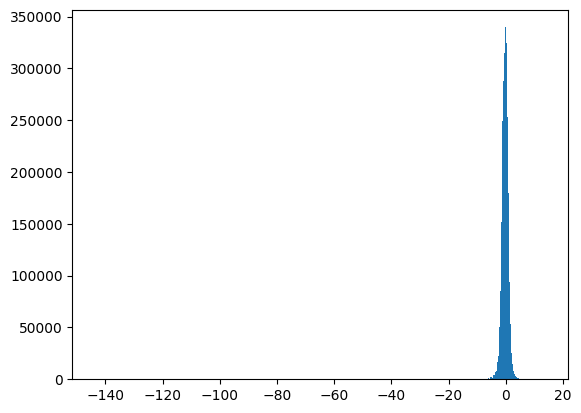

In [222]:
#convert df to np array for histogram (removing NaN)
test = mrna_df_x.values.flatten()
test = test[~pd.isnull(test)]
print(test.size)
print(np.min(test))
w=0.1
plt.hist(test, bins=np.arange(min(test), max(test) + w, w))
plt.show()


8790049


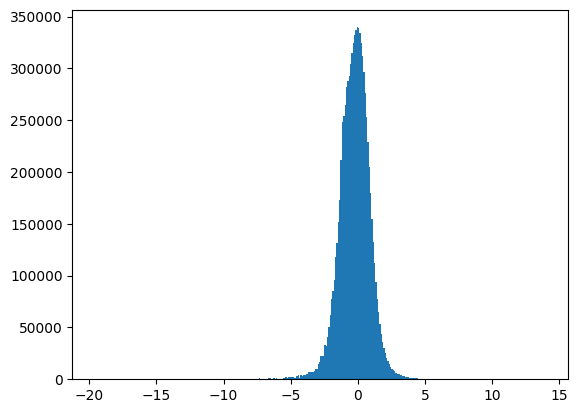

In [223]:
#clipping out large negative numbers
clipped_data = test[test>-20]
print(clipped_data.size)
w=0.1
plt.hist(clipped_data, bins=np.arange(min(clipped_data), max(clipped_data) + w, w))
plt.show()

In [224]:
print(mrna_df_1)

        Hugo_Symbol  LOC100130426      UBE2Q2P3    UBE2Q2P3.1     HMGB1P1  \
0    Entrez_Gene_Id  1.001304e+08  1.001331e+08  1.001349e+08  10357.0000   
1      TCGA-3Z-A93Z -3.086300e+00 -5.997000e-01  1.529400e+00     -0.1743   
2      TCGA-6D-AA2E -3.086300e+00 -8.006000e-01 -8.942000e-01     -1.4697   
3      TCGA-A3-3306 -3.086300e+00 -5.059000e-01  9.541000e-01     -0.4060   
4      TCGA-A3-3307 -3.086300e+00 -1.074700e+00 -1.385000e-01      0.5085   
..              ...           ...           ...           ...         ...   
530    TCGA-MM-A563 -3.086300e+00  1.910000e-02 -3.816000e-01      0.7654   
531    TCGA-MM-A564 -3.086300e+00  1.613500e+00 -6.012000e-01      0.5317   
532    TCGA-MM-A84U -3.086300e+00 -6.972000e-01  1.034100e+00     -0.7856   
533    TCGA-MW-A4EC -3.086300e+00  1.187000e+00  9.998000e-01      0.8189   
534    TCGA-T7-A92I -3.086300e+00 -3.087000e-01  1.230400e+00     -0.3162   

         TIMM23     MOXD2    LOC155060    RNU12-2P         SSX9  ...  \
0  

In [225]:

#print(mrna_df_x)
#mrna_df_1.drop(0, axis='index', inplace=True)



In [226]:
num = mrna_df_x._get_numeric_data()
num[num < -10] = None
num[num > 10] = None



In [227]:
recur_df = pd.read_csv('data_clinical_patient_onlydata.csv')
recur_ids = recur_df['PATIENT_ID']
recur_bool = recur_df['HISTORY_OTHER_MALIGNANCY']

y = []
for i in range(len(recur_bool)):
    if recur_ids[i] in new_ids:
        if recur_bool[i] == 'No':
            y.append(0)
        else:
            y.append(1)

print(y)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [228]:
#Additional Clinical data
clinical_df = pd.read_csv('data_clinical_patient_onlydata.csv')
clinical_ids = clinical_df['PATIENT_ID']

clinical_gender = clinical_df['SEX']
gender = []
for i in range(len(clinical_gender)):
    if clinical_ids[i] in new_ids:
        if clinical_gender[i].lower() == 'male':
            gender.append(0)
        else:
            gender.append(1)

clinical_age = clinical_df['AGE']
age = []
for i in range(len(clinical_age)):
    if clinical_ids[i] in new_ids:
        age.append(clinical_age[i])

clinical_stage = clinical_df['AJCC_PATHOLOGIC_TUMOR_STAGE']
stage = []
for i in range(len(clinical_stage)):
    if clinical_ids[i] in new_ids:
        if clinical_stage[i] == 'Stage I':
            stage.append(0)
        elif clinical_stage[i] == 'Stage II':
            stage.append(1)
        elif clinical_stage[i] == 'Stage III':
            stage.append(2)
        elif clinical_stage[i] == 'Stage IV':
            stage.append(3)
        else:
            stage.append(4)


In [229]:
unique_list = pd.Series(clinical_stage).drop_duplicates().tolist()
for x in unique_list:
    print(x)

Stage I
Stage III
Stage II
Stage IV
[Discrepancy]


In [230]:
print(len(age), len(stage), len(gender))

435 435 435


In [231]:
np.save('gender_data.npy', np.array(gender))
np.save('age_data.npy', np.array(age))
np.save('stage_data.npy', np.array(stage))


In [232]:
mrna_no_nan = mrna_df_x.dropna(axis=1)
print(mrna_no_nan)

     LOC100130426  UBE2Q2P3  UBE2Q2P3.1  TIMM23  LOC155060  RNU12-2P    SSX9  \
1         -3.0863   -0.5997      1.5294 -0.5550    -0.0905   -1.9249 -0.9372   
2         -3.0863   -0.8006     -0.8942  1.8552     0.1934    0.0736 -0.9372   
3         -3.0863   -0.5059      0.9541 -0.3691     0.0083    0.6337 -0.9372   
4         -3.0863   -1.0747     -0.1385 -0.6454    -0.0301    0.9199 -0.9372   
5         -3.0863    0.3223     -0.7343  0.1476     0.9885   -0.1476 -0.9372   
..            ...       ...         ...     ...        ...       ...     ...   
530       -3.0863    0.0191     -0.3816 -0.1537     1.4572    0.5848 -0.9372   
531       -3.0863    1.6135     -0.6012 -0.1316     2.2147   -1.9249 -0.9372   
532       -3.0863   -0.6972      1.0341  1.7282     0.8359    0.1353 -0.9372   
533       -3.0863    1.1870      0.9998 -0.4700     0.5836   -0.9869 -0.9372   
534       -3.0863   -0.3087      1.2304  1.3202    -0.0429    0.5720 -0.9372   

      EZHIP  EFCAB8  SRP14P1  ...    ZX

In [233]:
np.save('processed_mrna_data_zscore.npy', mrna_no_nan.to_numpy())
np.save('processed_recurrence_data_zscore.npy', np.array(recur))
mrna_no_nan.to_csv('zscore.csv')

In [234]:
mrna_df_x['target'] = recur
print(mrna_df_x['target'])

1      0
2      0
3      0
4      0
5      0
      ..
530    0
531    0
532    0
533    0
534    0
Name: target, Length: 435, dtype: int32


In [235]:
mrna_df_x.to_csv('zscore_tpot_data.csv')

In [236]:
mrna_df_x

,LOC100130426,UBE2Q2P3,UBE2Q2P3.1,HMGB1P1,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,LOC317712,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,TPTEP1,AKR1C6P,target
1,-3.0863,-0.5997,1.5294,-0.1743,-0.5550,NaN,-0.0905,-1.9249,-0.9372,NaN,...,-1.5330,-1.8220,0.6648,-1.5634,-0.1694,-0.8894,-1.2508,0.1191,-1.1115,0
2,-3.0863,-0.8006,-0.8942,-1.4697,1.8552,NaN,0.1934,0.0736,-0.9372,NaN,...,-1.4660,0.1925,-1.1695,-0.2838,-0.5352,0.8195,1.2450,2.0039,-1.1115,0
3,-3.0863,-0.5059,0.9541,-0.4060,-0.3691,NaN,0.0083,0.6337,-0.9372,NaN,...,0.5530,-1.9006,-1.3729,0.2363,-1.1693,-0.2563,1.3399,-0.7256,-1.1115,0
4,-3.0863,-1.0747,-0.1385,0.5085,-0.6454,NaN,-0.0301,0.9199,-0.9372,NaN,...,0.5613,0.3562,0.0273,0.2199,-0.0322,-0.4037,0.2349,0.1319,-1.1115,0
5,-3.0863,0.3223,-0.7343,0.3452,0.1476,NaN,0.9885,-0.1476,-0.9372,NaN,...,0.1270,1.4465,-1.4210,0.3683,0.4678,1.0259,1.0711,-0.8912,-1.1115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-3.0863,0.0191,-0.3816,0.7654,-0.1537,NaN,1.4572,0.5848,-0.9372,NaN,...,-1.0717,0.2287,0.9019,-0.4154,0.5904,0.0840,-0.4081,0.6171,-1.1115,0
531,-3.0863,1.6135,-0.6012,0.5317,-0.1316,NaN,2.2147,-1.9249,-0.9372,NaN,...,-0.5223,-1.7481,-1.9460,-1.0858,-0.2986,-0.9393,-0.4785,-0.1280,-1.1115,0
532,-3.0863,-0.6972,1.0341,-0.7856,1.7282,NaN,0.8359,0.1353,-0.9372,NaN,...,-1.4321,-0.6931,-1.5856,-1.2657,0.7237,0.0762,-0.8519,2.6883,-1.1115,0
533,-3.0863,1.1870,0.9998,0.8189,-0.4700,NaN,0.5836,-0.9869,-0.9372,NaN,...,-0.2302,-1.6516,-0.5117,-1.2706,-0.0192,-0.2676,-1.3052,-0.4012,-1.1115,0
